In [2]:
from fastbook import *


In [3]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://s1.picswalls.com/wallpapers/2014/07/18/birds-picture_104548844_54.jpg')

In [4]:
dest =  Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

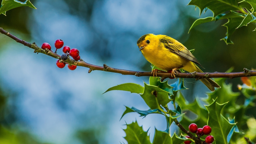

In [5]:
im = Image.open(dest)
im.to_thumb(256,256)

making searches by `forest_photo` and `bird_photo` in duckduckGo, downloading 200 of them, and storing them in fold1ers with a size of `400x400`    

In [6]:
Path('woman_age').mkdir(exist_ok=True)

In [3]:
searches = '15', '20', '25', '30', '35', '40'
path = Path('woman_age')

if path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'woman {o} years old photo')
        download_images(dest, urls = results[:200])
        resize_images(dest, max_size=400, dest=dest)


deleting broken images if any 

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#3) [None,None,None]

Creating `DataBlock`, contains all the information needed to create a model 

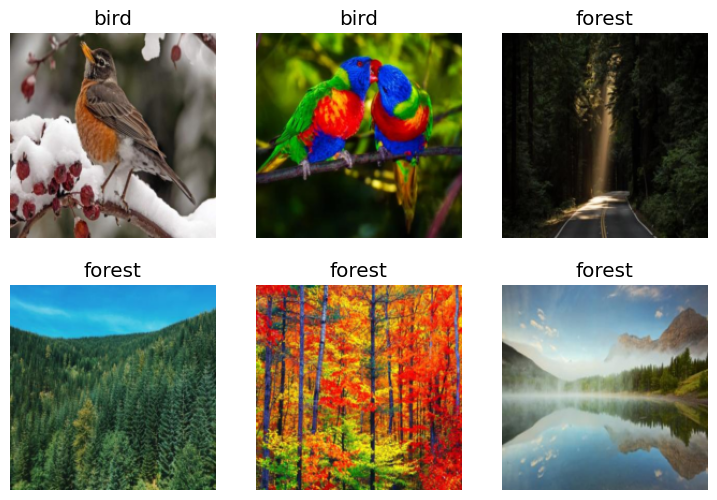

In [9]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=[Resize(192, method='squish')]).dataloaders(path)
dls.show_batch(max_n=6)

Learning model

In [10]:
# learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

/home/celso/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/celso/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.727154,0.207614,0.046053,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.028623,0.000286,0.000000,00:21
1,0.014435,0.000265,0.000000,00:21
2,0.011633,0.000240,0.000000,00:21


Checking the probability of a given image being a bird 
rounding to the nearest 4 decimal places

In [12]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f" this is a: {is_bird}.")
print(f" probability it's a bird: {probs[0]:.4f}")

 this is a: bird.
 probability it's a bird: 1.0000
